In [1]:
# Importing important libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Setting display options

pd.set_option('display.max_columns', 500)

In [3]:
# Loading the required datasets

# Loading the dataset related to Loan Applications

application_data = pd.read_csv("application_data.csv")

In [4]:
# Displaying the loaded dataset's head for quick glance

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# View the shape of the dataset

application_data.shape

(307511, 122)

In [6]:
# Let's understand the data types of all the columns and counts

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


- This is not sufficient information as there are too many columns present in the loaded dataframe, so we will handle this case in Data Handling step.

In [7]:
# Let's view the statistical information from the columns those are already numeric

application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Data Handling and Data Cleaning
- We will analyze the columns that are required for the analysis, according to the business objective
- We will handle and manage the missing or null values that are present in some of the columns.
- We will correct the data types of certain columns.

#### Extracting required columns
- Let's view the columns and their importance for the analysis.
- We will keep only those columns that are required to achieve the business objective.
- We will ignore all the other extra informations that are present in the dataframe and are not required.

In [8]:
# Let's view first 31 columns

application_data.iloc[:,:30].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0


#### Dropping below mentioned columns after understanding their requirement.
- These columns after dropping are not going to affect the analysis according to the business objective.
    - NAME_TYPE_SUITE
    - REGION_POPULATION_RELATIVE
    - DAYS_REGISTRATION
    - DAYS_ID_PUBLISH
    - FLAG_MOBIL
    - FLAG_EMP_PHONE
    - FLAG_WORK_PHONE
    - FLAG_CONT_MOBILE
    - FLAG_PHONE
    - FLAG_EMAIL

In [9]:
# Deleting the above mentioned columns

del application_data['NAME_TYPE_SUITE']
del application_data['REGION_POPULATION_RELATIVE']
del application_data['DAYS_REGISTRATION']
del application_data['DAYS_ID_PUBLISH']
application_data.drop(application_data.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'],axis = 1,inplace=True)

In [10]:
# Displaying the dataframe after performing the operation

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,NaN,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,NaN,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,26.0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-30

In [11]:
# Displaying the number of rows and columns

application_data.shape

(307511, 112)

In [12]:
# Let's analyze the remaining rows and their necessity for the analysis.

application_data.loc[:,'WEEKDAY_APPR_PROCESS_START':].head()

,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- This dataframe have a lot of non-required and non-essential columns and removing those may not affect our analysis to achieve the business objective.
- After having glance through the columns, only ORGANIZATION_TYPE is required, hence we will extract only that column for further analysis, and ignoring all other columns.

In [13]:
# Dropping non-essential columns from the data

application_data.drop(application_data.loc[:,'REGION_RATING_CLIENT':'LIVE_CITY_NOT_WORK_CITY'],axis = 1,inplace=True)
application_data.drop(application_data.loc[:,'EXT_SOURCE_1':],axis = 1,inplace=True)

In [14]:
# Displaying the result after dropping the columns

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,NaN,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,NaN,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,26.0,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,NaN,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,NaN,Core staff,1.0,Religion


In [15]:
# Analyze final shape of the dataframe after operations.

application_data.shape

(307511, 21)

In [16]:
# Displaying the info again so that we can get the information about data types and non-null values.

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   FLAG_OWN_REALTY      307511 non-null  object 
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   AMT_ANNUITY          307499 non-null  float64
 10  AMT_GOODS_PRICE      307233 non-null  float64
 11  NAME_INCOME_TYPE     307511 non-null  object 
 12  NAME_EDUCATION_TYPE  307511 non-null  object 
 13  NAME_FAMILY_STATUS   307511 non-null  object 
 14  NAME_HOUSING_TYPE    307511 non-null  object 
 15  DAYS_BIRTH       

- Now, we have information about columns that are required for analysis. Now we are going to analyze each and every column for null checks and missing values. We can then perform sanity checks also.

In [17]:
# Let's analyze the count of null values present in all the columns.

application_data.isnull().sum()

SK_ID_CURR                  0
TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                12
AMT_GOODS_PRICE           278
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
OWN_CAR_AGE            202929
OCCUPATION_TYPE         96391
CNT_FAM_MEMBERS             2
ORGANIZATION_TYPE           0
dtype: int64

In [18]:
# Let's find the percentage of missing data in the OWN_CAR_AGE column

application_data.OWN_CAR_AGE.isnull().sum()/application_data.shape[0]*100

65.9908100848425

In [19]:
# As 65% data is missing in the OWN_CAR_AGE column, so we will discard the column from analysis

application_data.drop(columns=['OWN_CAR_AGE'],axis = 1,inplace=True)

In [20]:
# Let's again analyze the count of null values present in all the columns.

application_data.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY               12
AMT_GOODS_PRICE          278
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
OCCUPATION_TYPE        96391
CNT_FAM_MEMBERS            2
ORGANIZATION_TYPE          0
dtype: int64

In [21]:
# Let's find the percentage of missing data in the OWN_CAR_AGE column.

application_data.OCCUPATION_TYPE.isnull().sum()/application_data.shape[0]*100

31.345545362604916

- As approximately 30% of the data is missing, then we can directly drop the column as it may affect the analysis.
- But again, that totally depends upon the importance of the column to achieve business objective.
- So, we will analyze the values present in the OCCUPATION_TYPE column and then decide whether to delete it or not based on the  present and missing data.

In [22]:
# Let's identify the values present in the OCCUPATION_TYPE column.

application_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [23]:
# Let's analyze the missing value in the OCCUPATION_TYPE column.

application_data[application_data.OCCUPATION_TYPE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20099,365243,NaN,2.0,XNA
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20417,365243,NaN,2.0,XNA
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24827,365243,NaN,2.0,XNA
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,675000.0,State servant,Higher education,Single / not married,House / apartment,-9994,-1796,NaN,1.0,Military
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,477000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-15280,-2668,NaN,2.0,Business Entity Type 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,0,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,270000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-16010,-1185,NaN,3.0,Business Entity Type 2
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23125,365243,NaN,2.0,XNA
307500,456244,0,Cash loans,F,N,Y,0,261000.000,1303812.0,35982.0,1138500.0,Working,Higher education,Married,House / apartment,-20390,-5326,NaN,2.0,Business Entity Type 3
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-24384,365243,NaN,1.0,XNA


- As we can see, the data is evenly spread accross all the columns, so can't find any specific pattern in the columns.
- But, for the analysis purpose, keeping OCCUPATION_TYPE column though can be used to draw some insights and might help in achieving business objectives.
- Hence, we will `keep the OCCUPATION_TYPE column with ~31% of the missing values separately placed into another category as Others` and then proceed further.

In [24]:
# Placing the null values into 'Other' category 

application_data.OCCUPATION_TYPE.fillna(value='Other',inplace=True)

In [25]:
# Counting the number of null values again to check 

application_data.OCCUPATION_TYPE.isnull().sum()

0

In [26]:
# Let's analyse the AMT_ANNUITY column for the missing values.

application_data[application_data.AMT_ANNUITY.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10668,-2523,High skill tech staff,1.0,Business Entity Type 3
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Working,Lower secondary,Civil marriage,House / apartment,-9027,-1270,Laborers,2.0,Business Entity Type 1
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Working,Secondary / secondary special,Married,House / apartment,-17376,-3950,Cooking staff,2.0,Self-employed
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,State servant,Higher education,Married,House / apartment,-11329,-2040,Core staff,2.0,Government
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19762,-2498,Laborers,1.0,Other
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Working,Higher education,Single / not married,Rented apartment,-20831,-2450,Drivers,1.0,Business Entity Type 3
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,State servant,Secondary / secondary special,Married,House / apartment,-12134,-3721,Medicine staff,2.0,Medicine
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13902,-3540,Secretaries,2.0,Self-employed
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,486000.0,Commercial associate,Higher education,Married,House / apartment,-10151,-472,Security staff,2.0,Security
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,499500.0,Commercial associate,Higher education,Married,Municipal apartment,-16344,-1478,Sales staff,2.0,Business Entity Type 3


- As we can see, the target column has only 0 value, so directly dropping those rows may affect the risk analysis.
- So we will assign those null values with the median, even though it is not correct way to assign AMT_ANNUITY.

In [27]:
# Assigning the missing null values in the AMT_ANNUITY column with the median value of the column.

application_data.AMT_ANNUITY.fillna(application_data.AMT_ANNUITY.median, inplace=True)

In [28]:
# Counting the number of null values again to check 

application_data.AMT_ANNUITY.isnull().sum()

0

In [29]:
# Let's find the null values in appapplication_data once again. 

application_data.isnull().sum()

SK_ID_CURR               0
TARGET                   0
NAME_CONTRACT_TYPE       0
CODE_GENDER              0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY              0
AMT_GOODS_PRICE        278
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
DAYS_BIRTH               0
DAYS_EMPLOYED            0
OCCUPATION_TYPE          0
CNT_FAM_MEMBERS          2
ORGANIZATION_TYPE        0
dtype: int64

In [30]:
# Let's consider CNT_FAM_MEMBERS

application_data[application_data.CNT_FAM_MEMBERS.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750,NaN,Commercial associate,Lower secondary,Unknown,Municipal apartment,-12396,-1161,Managers,NaN,Insurance
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250,NaN,Commercial associate,Higher education,Unknown,House / apartment,-12844,-232,Accountants,NaN,Business Entity Type 2


In [31]:
# Assigning the count of family members is not logically suitable.
# So we will remove these entries from the data set.

application_data = application_data[~application_data.CNT_FAM_MEMBERS.isnull()]

In [32]:
# Now let's consider AMT_GOODS_PRICE, let's analyze the missing values
# Calculating the percentage of missing data in AMT_GOODS_PRICE.

(application_data.AMT_GOODS_PRICE.isnull().sum()/application_data.shape[0])*100

0.08975347063012791

In [33]:
# The missing percentage is very less, that means we have to deal with the missing values and take some decision accordingly
# Let's view the missing data

application_data[application_data.AMT_GOODS_PRICE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,-10072,-381,Core staff,4.0,Kindergarten
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500,NaN,Working,Secondary / secondary special,Married,House / apartment,-11993,-2921,Private service staff,2.0,Business Entity Type 3
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125,NaN,Working,Higher education,Married,House / apartment,-9727,-2712,Accountants,2.0,Trade: type 7
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,-11079,-899,Managers,3.0,Government
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500,NaN,Working,Higher education,Single / not married,House / apartment,-9986,-1847,Security staff,1.0,Construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,452992,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125,NaN,Working,Higher education,Married,House / apartment,-11313,-1470,Sales staff,4.0,Business Entity Type 3
304784,453120,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500,NaN,Working,Secondary / secondary special,Married,House / apartment,-16870,-825,Drivers,3.0,Self-employed
305833,454341,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500,NaN,Working,Incomplete higher,Single / not married,With parents,-10440,-3444,Core staff,1.0,Self-employed
306126,454683,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500,NaN,Commercial associate,Secondary / secondary special,Married,Municipal apartment,-15406,-427,Other,2.0,Security


In [34]:
# Let's view the some random values where the data can be present.

application_data.sample(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
9596,111153,0,Cash loans,F,N,N,0,315000.0,2250000.0,59355,2250000.0,State servant,Higher education,Married,House / apartment,-19481,-12822,Managers,2.0,Military
15323,117888,0,Cash loans,M,Y,Y,0,315000.0,785259.0,40225.5,634500.0,Commercial associate,Higher education,Married,House / apartment,-15874,-1159,Managers,2.0,Business Entity Type 3
267286,409680,0,Cash loans,F,N,Y,1,112500.0,170640.0,13612.5,135000.0,Commercial associate,Secondary / secondary special,Separated,House / apartment,-12688,-986,Sales staff,2.0,Self-employed
275393,419144,0,Revolving loans,F,N,Y,1,112500.0,270000.0,13500,270000.0,Commercial associate,Higher education,Single / not married,House / apartment,-19257,-1258,Core staff,2.0,Medicine
41985,148610,0,Revolving loans,F,N,N,0,67500.0,180000.0,9000,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-7836,-945,Sales staff,1.0,Business Entity Type 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114786,233100,0,Cash loans,F,N,Y,1,126000.0,813195.0,27004.5,702000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12442,-3480,Managers,3.0,Self-employed
137331,259271,0,Cash loans,F,Y,Y,0,157500.0,592560.0,27589.5,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-9219,-422,Laborers,2.0,Other
108947,226364,0,Cash loans,M,Y,Y,1,360000.0,835380.0,40320,675000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-10780,-1952,Other,3.0,Industry: type 3
111228,229049,0,Cash loans,F,N,Y,2,261000.0,403330.5,29358,333000.0,Commercial associate,Incomplete higher,Married,House / apartment,-15424,-4254,Managers,4.0,Agriculture


- After going through the data, AMT_CREDIT and AMT_GOODS_PRICE ,these columns seem to be approximately equal.
- To deal with the missing values in the column AMT_GOODS_PRICE, we can use above logic `where the missing values can be replaced with the values from AMT_CREDIT column`. And this is also logically correct in real life :)

In [35]:
# Replacing the null values of AMT_GOODS_PRICE with the values from AMT_CREDIT column.

isnull_AMT_GOODS_PRICE = application_data[application_data.AMT_GOODS_PRICE.isnull()]
isnull_AMT_GOODS_PRICE['AMT_GOODS_PRICE'] = isnull_AMT_GOODS_PRICE['AMT_CREDIT']
isnull_AMT_GOODS_PRICE

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10072,-381,Core staff,4.0,Kindergarten
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500,450000.0,Working,Secondary / secondary special,Married,House / apartment,-11993,-2921,Private service staff,2.0,Business Entity Type 3
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125,202500.0,Working,Higher education,Married,House / apartment,-9727,-2712,Accountants,2.0,Trade: type 7
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-11079,-899,Managers,3.0,Government
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500,450000.0,Working,Higher education,Single / not married,House / apartment,-9986,-1847,Security staff,1.0,Construction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,452992,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125,202500.0,Working,Higher education,Married,House / apartment,-11313,-1470,Sales staff,4.0,Business Entity Type 3
304784,453120,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500,270000.0,Working,Secondary / secondary special,Married,House / apartment,-16870,-825,Drivers,3.0,Self-employed
305833,454341,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500,270000.0,Working,Incomplete higher,Single / not married,With parents,-10440,-3444,Core staff,1.0,Self-employed
306126,454683,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500,270000.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,-15406,-427,Other,2.0,Security


In [36]:
# Assigning the replaced values back in the application_data dataframe.

application_data[application_data.AMT_GOODS_PRICE.isnull()] = isnull_AMT_GOODS_PRICE
application_data.AMT_GOODS_PRICE.isnull().sum()

0

In [37]:
# Now let's check the null count of values in the dataframe once again.

application_data.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
ORGANIZATION_TYPE      0
dtype: int64

In [38]:
# Let's view the data in the application_data.

application_data.sample(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
132004,253097,0,Cash loans,M,Y,N,0,225000.0,152820.0,16587,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-12179,-1250,Accountants,1.0,Construction
81254,194214,0,Cash loans,F,N,Y,0,315000.0,675000.0,36616.5,675000.0,Working,Secondary / secondary special,Married,House / apartment,-18366,-2416,Sales staff,2.0,Self-employed
195830,327072,0,Cash loans,F,N,Y,0,76500.0,270000.0,26302.5,270000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21864,365243,Other,2.0,XNA
59140,168550,0,Cash loans,F,N,Y,2,67500.0,337761.0,17374.5,256500.0,Working,Secondary / secondary special,Married,House / apartment,-15014,-4535,Sales staff,4.0,Self-employed
248173,387140,0,Revolving loans,F,N,Y,0,90000.0,337500.0,16875,337500.0,State servant,Higher education,Civil marriage,Municipal apartment,-19388,-6639,Managers,2.0,Police
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21257,124770,0,Revolving loans,F,N,Y,2,81000.0,270000.0,13500,270000.0,Working,Secondary / secondary special,Married,House / apartment,-15005,-3137,Sales staff,4.0,Self-employed
273573,417095,0,Cash loans,M,Y,Y,0,225000.0,101880.0,11101.5,90000.0,State servant,Incomplete higher,Married,House / apartment,-11788,-3489,Laborers,2.0,Military
118653,237594,0,Cash loans,F,N,Y,2,112500.0,1075500.0,45697.5,1075500.0,Working,Secondary / secondary special,Married,House / apartment,-11674,-2394,Other,4.0,Other
272832,416268,0,Cash loans,F,Y,Y,0,243000.0,568858.5,29173.5,432000.0,Working,Higher education,Married,House / apartment,-13001,-1498,Other,2.0,Medicine


In [39]:
# Just an observation, we can see some XNA values in the ORGANIZATION_TYPE column.
# Let's view the data spread in ORGANIZATION_TYPE column.

application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

- Oops!, there are many XNA values in the ORGANIZATION_TYPE column.
- May be those are missing values where the missing value identifier is XNA. XNA/XAP denote NA values.

In [40]:
# Checking the percentage of the XNA values in ORGANIZATION_TYPE.

application_data[application_data.ORGANIZATION_TYPE == 'XNA'].shape[0]/application_data.shape[0]*100

18.00727783577066

- Analyzing the type of data present in the ORGANIZATION_TYPE column, there is one special organization type as 'Other'.
- So we can place the XNA category in 'Other' category.

In [41]:
# Replace the XNA value with 'Other'

application_data.ORGANIZATION_TYPE = application_data.ORGANIZATION_TYPE.apply(lambda x: np.NaN if x=='XNA' else x)
application_data.ORGANIZATION_TYPE.fillna(value="Other",inplace=True)
application_data.ORGANIZATION_TYPE.value_counts()

Other                     72057
Business Entity Type 3    67992
Self-employed             38412
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [42]:
# Inspect the final result set for null/missing values.

application_data.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
ORGANIZATION_TYPE      0
dtype: int64

## Handling Outliers and analysis of the data spread in all columns
- We will analyze the data spread in the columns and then decide what decision should be taken to handle outliers.
- Also, we will reduce the data in the suitable format for analysis.

In [43]:
# Displaying the application data

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,Core staff,1.0,Religion


In [44]:
#Let's analyze the important columns where outliers might be observed.
#Let's consider AMT_INCOME_TOTAL first.

application_data.AMT_INCOME_TOTAL.describe()

count    3.075090e+05
mean     1.687969e+05
std      2.371234e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

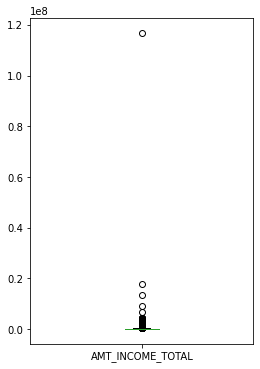

In [45]:
#Let's plot a box plot for this column

plt.figure(figsize=[4,6])
application_data.AMT_INCOME_TOTAL.plot.box()
plt.show()

- Clearly we can see one outlier where the income is more than 100 million
- We can delete this entry because, it may affect the overall statistics matrics for the column as well as it might not be required to consider the analysis.

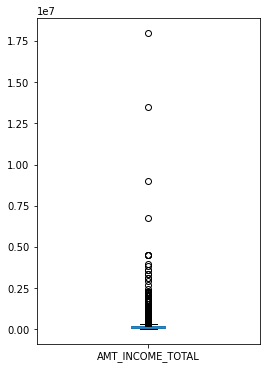

In [46]:
application_data = application_data[application_data.AMT_INCOME_TOTAL <= 100*pow(10,6)]

#Plot a box plot for this column once again

plt.figure(figsize=[4,6])
application_data.AMT_INCOME_TOTAL.plot.box()
plt.show()

#### Analysis of the result:
1. Large amount of data is clustered between income of 0 to 2.5 million units.
2. There are some exceptional cases/ outliers are present for the income greater than 5 million units income. So we will again consider the income range below 5 million for further analysis.

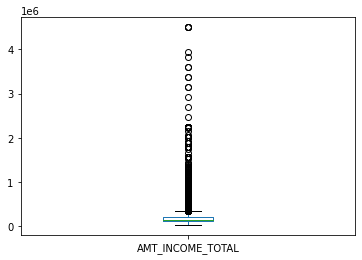

In [47]:
# Checkcing the box plot for values below 5 million.

application_data[application_data.AMT_INCOME_TOTAL <= 5*pow(10,6)].AMT_INCOME_TOTAL.plot.box()

- Still there are some outliers/cases which should be eliminated.
- To do this, we can now analyze the AMT_INCOME_TOTAL below 1.5 million units and then take the decision for outliers.

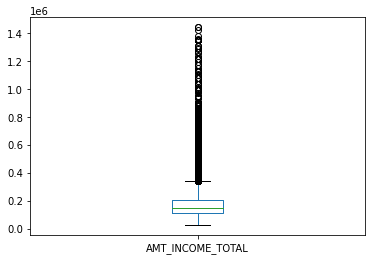

In [48]:
# Checkcing the box plot for values below 5 million.

application_data[application_data.AMT_INCOME_TOTAL <= 1.5*pow(10,6)].AMT_INCOME_TOTAL.plot.box()

In [49]:
# This looks some appreciable distribution of the income values, where median is between 0.1 million to 0.2 million and 75% quantile is at 0.2 million.
# Eliminating the values that lie in the 99% to 100% quantile.

application_data = application_data[application_data.AMT_INCOME_TOTAL <= 1.5*pow(10,6)]

In [50]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,Core staff,1.0,Religion


In [51]:
# Checking the number of final rows and columns again

application_data.shape

(307425, 20)

In [52]:
#Let's consider AMT_CREDIT column

application_data.AMT_CREDIT.describe()

count    3.074250e+05
mean     5.988794e+05
std      4.023261e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

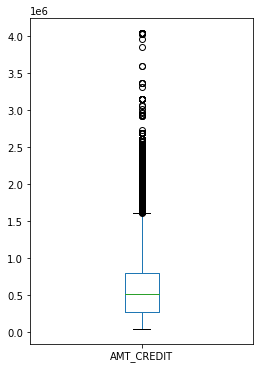

In [53]:
#Let's plot a box plot for this column

plt.figure(figsize=[4,6])
application_data.AMT_CREDIT.plot.box()
plt.show()

- There are some outliers which has value greater than 3.5 million, so we will consider only those values for further analysis.

In [54]:
# Eliminating the values that are greater than 3.5 million

application_data = application_data[application_data.AMT_CREDIT <= 3.5*pow(10,6)]

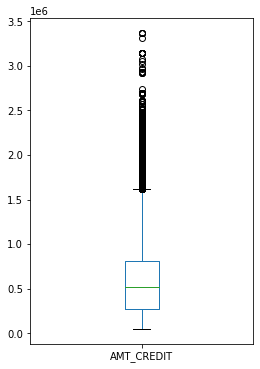

In [55]:
#Let's plot a box plot for this column

plt.figure(figsize=[4,6])
application_data.AMT_CREDIT.plot.box()
plt.show()

In [56]:
# Let's view the data above 2.6 million units for the column

application_data[application_data.AMT_CREDIT > 2.6*pow(10,6)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
7061,108224,0,Cash loans,F,Y,N,0,1035000.0,2695500.0,74254.5,2250000.0,Commercial associate,Higher education,Separated,House / apartment,-10871,-490,Accountants,1.0,Business Entity Type 3
7642,108906,0,Cash loans,M,Y,N,1,382500.0,2925000.0,73944,2925000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-15752,-933,Managers,3.0,Trade: type 7
8103,109450,0,Cash loans,F,N,N,0,234000.0,2695500.0,77382,2250000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-20439,-267,Other,2.0,Business Entity Type 3
8189,109548,0,Cash loans,M,N,Y,1,472500.0,2606400.0,79155,2250000.0,Working,Secondary / secondary special,Married,House / apartment,-16798,-7961,Managers,3.0,Other
8940,110403,1,Cash loans,M,Y,Y,0,315000.0,2961000.0,105512,2961000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-22484,-1445,Laborers,2.0,Industry: type 9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294250,440893,0,Cash loans,F,N,N,0,246996.0,2931660.0,74110.5,2700000.0,State servant,Higher education,Married,House / apartment,-19041,-10105,Managers,2.0,Kindergarten
295655,442537,0,Cash loans,F,Y,Y,0,382500.0,2695500.0,71235,2250000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16702,-5750,Managers,2.0,Transport: type 1
297808,445019,0,Cash loans,M,N,Y,0,427500.0,2695500.0,71235,2250000.0,Commercial associate,Higher education,Married,House / apartment,-19776,-9932,Managers,2.0,Industry: type 9
300186,447771,0,Cash loans,M,Y,N,2,264901.5,2700000.0,68386.5,2700000.0,State servant,Secondary / secondary special,Married,House / apartment,-14409,-1278,Managers,4.0,Military


In [57]:
# Ignoring the values above 2.6 million units from the column.

application_data = application_data[application_data.AMT_CREDIT < 2.6*pow(10,6)]

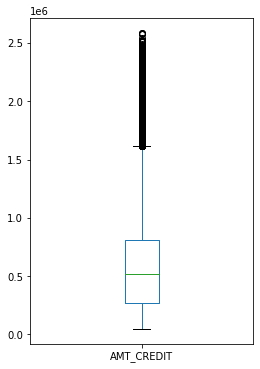

In [58]:
#Let's plot a box plot for this column

plt.figure(figsize=[4,6])
application_data.AMT_CREDIT.plot.box()
plt.show()

In [59]:
application_data.shape

(307298, 20)

In [60]:
# Let's consider the column AMT_ANNUITY for the outliers.

application_data.AMT_ANNUITY.describe()

count     307298.0
unique     13628.0
top         9000.0
freq        6384.0
Name: AMT_ANNUITY, dtype: float64

In [61]:
# Check the types of values present in the AMT_ANNUITY column.

application_data.AMT_ANNUITY.dtypes

dtype('O')

In [62]:
# Let's check the values from the columns that are not integer or float.

odd_man_out_amt_annuity = application_data.AMT_ANNUITY.apply(lambda x: 1 if ((type(x)==int) or (type(x)==float))  else 0)
application_data[odd_man_out_amt_annuity == 0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,<bound method Series.median of 0 24700...,450000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10668,-2523,High skill tech staff,1.0,Business Entity Type 3
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,<bound method Series.median of 0 24700...,450000.0,Working,Lower secondary,Civil marriage,House / apartment,-9027,-1270,Laborers,2.0,Business Entity Type 1
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,<bound method Series.median of 0 24700...,450000.0,Working,Secondary / secondary special,Married,House / apartment,-17376,-3950,Cooking staff,2.0,Self-employed
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,<bound method Series.median of 0 24700...,225000.0,State servant,Higher education,Married,House / apartment,-11329,-2040,Core staff,2.0,Government
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,<bound method Series.median of 0 24700...,360000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19762,-2498,Laborers,1.0,Other
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,<bound method Series.median of 0 24700...,166500.0,Working,Higher education,Single / not married,Rented apartment,-20831,-2450,Drivers,1.0,Business Entity Type 3
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,<bound method Series.median of 0 24700...,157500.0,State servant,Secondary / secondary special,Married,House / apartment,-12134,-3721,Medicine staff,2.0,Medicine
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,<bound method Series.median of 0 24700...,720000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13902,-3540,Secretaries,2.0,Self-employed
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,<bound method Series.median of 0 24700...,486000.0,Commercial associate,Higher education,Married,House / apartment,-10151,-472,Security staff,2.0,Security
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,<bound method Series.median of 0 24700...,499500.0,Commercial associate,Higher education,Married,Municipal apartment,-16344,-1478,Sales staff,2.0,Business Entity Type 3


In [63]:
# Consider rows from AMT_ANNIUTY column where there are no objects.

application_data = application_data[odd_man_out_amt_annuity != 0]

In [64]:
# Let's convert the int values to float.

application_data.AMT_ANNUITY = application_data.AMT_ANNUITY.apply(lambda x: float(x))

In [65]:
# Check for the type of values in ANNUITY column again

application_data.AMT_ANNUITY.dtype

dtype('float64')

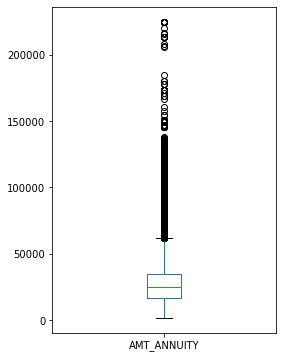

In [66]:
# Let's plot a box plot for the AMT_ANNUITY Column.

plt.figure(figsize=[4,6])
application_data.AMT_ANNUITY.plot.box()
plt.show()

In [67]:
#  Let's consider the data where AMT_ANNUITY value is < 140000 as remaining can affect our analysis.

application_data =  application_data[application_data.AMT_ANNUITY<140000]

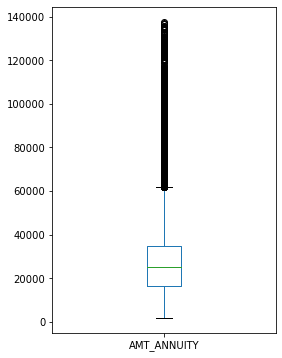

In [68]:
# Let's plot a box plot for the AMT_ANNUITY Column.

plt.figure(figsize=[4,6])
application_data.AMT_ANNUITY.plot.box()
plt.show()

In [69]:
# Let's consider the column AMT_GOODS_PRICE for the outliers.

application_data.AMT_GOODS_PRICE.describe()

count    3.072170e+05
mean     5.368117e+05
std      3.659857e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      2.547000e+06
Name: AMT_GOODS_PRICE, dtype: float64

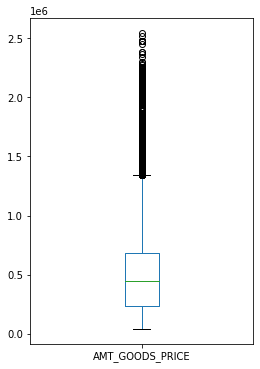

In [70]:
# Let's plot a box plot for the AMT_GOODS_PRICE Column

plt.figure(figsize=[4,6])
application_data.AMT_GOODS_PRICE.plot.box()
plt.show()

In [71]:
# Let's consider the values below 2.3 million units

application_data =  application_data[application_data.AMT_GOODS_PRICE<2.3*pow(10,6)]

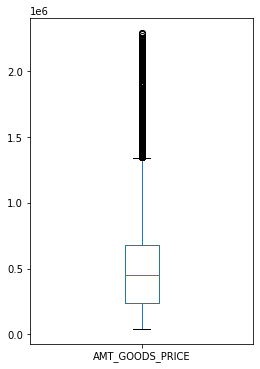

In [72]:
# Let's plot a box plot for the AMT_GOODS_PRICE Column

plt.figure(figsize=[4,6])
application_data.AMT_GOODS_PRICE.plot.box()
plt.show()

In [73]:
# Let's display the data again for further analysis

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,Core staff,1.0,Religion


- Let's analyze the outliers for DAYS_BIRTH and DAYS_EMPLOYED columns
- The values there are present w.r.t date of application, so we have to change the sign of the numbers for understanding purpose.
- We can then convert days to years and then assign those to new columns.

In [74]:
# Check the statistical information of the DAYS_BIRTH columns

application_data.DAYS_BIRTH.describe()

count    307204.000000
mean     -16037.348267
std        4364.468156
min      -25201.000000
25%      -19683.000000
50%      -15751.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [75]:
# Check the statistical information of the DAYS_EMPLOYED columns

application_data.DAYS_EMPLOYED.describe()

count    307204.000000
mean      63858.726328
std      141311.772526
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

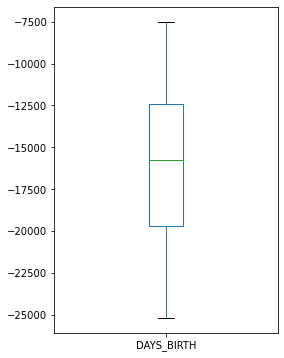

In [76]:
# Let's plot a  box plot for DAYS_BIRTH

plt.figure(figsize=[4,6])
application_data.DAYS_BIRTH.plot.box()
plt.show()

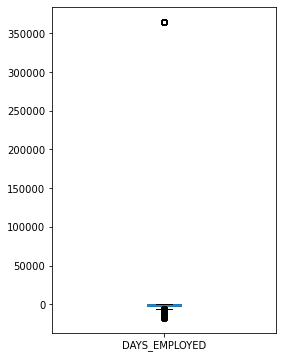

In [77]:
# Let's plot a  box plot for DAYS_EMPLOYED

plt.figure(figsize=[4,6])
application_data.DAYS_EMPLOYED.plot.box()
plt.show()

- We can see there are some outlier values which have values >350000
- We will keep those values as null because that may affect our analysis for the columns.
- Also, assigning that large number of values with median/mean may hamper our analysis, as the percentage of such values is very huge i.e. ~18%.

In [78]:
# We can see an outlier having >350000 value.  So we can ignore such values and keep those as null
# Converting those days values into years and then storing into new columns.

application_data['YEARS_BIRTH'] = application_data.DAYS_BIRTH.apply(lambda x: -x/365.0)
application_data.DAYS_EMPLOYED[application_data.DAYS_EMPLOYED > 350000] = np.NaN
application_data['YEARS_EMPLOYED'] = application_data.DAYS_EMPLOYED.apply(lambda x: -x/365.0)

In [79]:
# Deleting the days columns

del application_data['DAYS_BIRTH']
del application_data['DAYS_EMPLOYED']

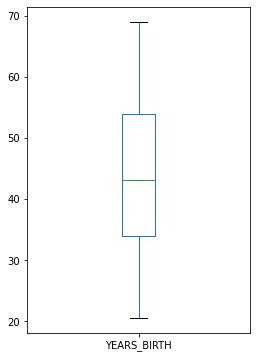

In [80]:
# Let's plot a  box plot for YEARS_BIRTH

plt.figure(figsize=[4,6])
application_data.YEARS_BIRTH.plot.box()
plt.show()

- The values are equally spread through out the data and there are no outliers present in the data, so we dont have to deal with it. 

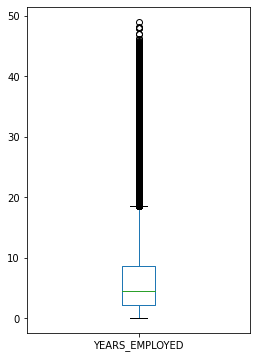

In [81]:
# Let's plot a  box plot for YEARS_EMPLOYED

plt.figure(figsize=[4,6])
application_data.YEARS_EMPLOYED.plot.box()
plt.show()

- Now the data imbalance is reduced by very large amount after replacing the outliers. We will proceed with further analysis.

## Univariate Analysis for Columns
- We will now analyze the data spread across individual columns and create some better visualizations.
- We will use various graphs such as bar graph, pie charts, histograms if required.

In [82]:
# Displaying the data again

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Business Entity Type 3,25.920548,1.745205
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,45.931507,3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Government,52.180822,0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,52.068493,8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,1.0,Religion,54.608219,8.323288


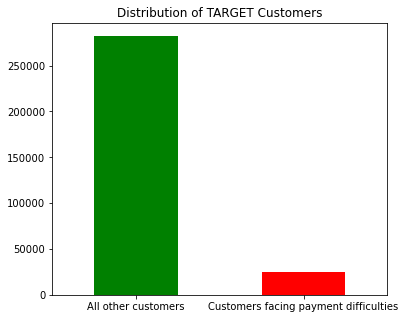

In [83]:
# Let's analyze how targeted customers are spread across the data

plt.figure(figsize=[6,5])
graph = application_data.TARGET.value_counts().plot.bar(color=['G','R'])
plt.xticks([0,1],['All other customers','Customers facing payment difficulties'],rotation=0)
graph.set_title("Distribution of TARGET Customers")
plt.show()

In [84]:
# Let's analyze the genders

application_data.CODE_GENDER.value_counts()

F      202304
M      104896
XNA         4
Name: CODE_GENDER, dtype: int64

In [85]:
# We have found there are some XNA values are present in Gender Category.
# we will remove those as there are very less count of such values are present (May be outliers or unknown).

application_data.CODE_GENDER = application_data.CODE_GENDER.apply(lambda x: np.NaN if x=='XNA' else x)
application_data.CODE_GENDER = application_data.CODE_GENDER[~application_data.CODE_GENDER.isnull()]
application_data.CODE_GENDER.value_counts()

F    202304
M    104896
Name: CODE_GENDER, dtype: int64

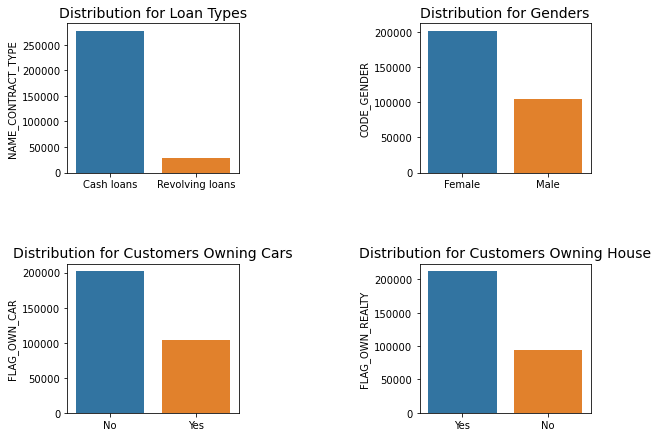

In [86]:
# We will plot multiple subplot to analyze the columns.
# There plots contain analysis of customers for Loan Types, Genders, Owning Cars and Owning Flats.

fig, ax = plt.subplots(2, 2, figsize=(8,6))
# Making a plot with 2 subplots

loan_types = application_data.NAME_CONTRACT_TYPE.value_counts()
genders = application_data.CODE_GENDER.value_counts()
owns_cars = application_data.FLAG_OWN_CAR.value_counts()
own_reality = application_data.FLAG_OWN_REALTY.value_counts()

fig.tight_layout(h_pad=7,w_pad=15)
sns.barplot(x=loan_types.index, y=loan_types, ax=ax[0][0])
ax[0][0].set_title("Distribution for Loan Types", fontsize=14)
sns.barplot(x=genders.index, y=genders, ax=ax[0][1])
ax[0][1].set_title("Distribution for Genders", fontsize=14)
ax[0][1].set_xticklabels(['Female','Male'])
sns.barplot(x=owns_cars.index, y=owns_cars, ax=ax[1][0])
ax[1][0].set_title("Distribution for Customers Owning Cars", fontsize=14)
ax[1][0].set_xticklabels(['No','Yes'])
sns.barplot(x=own_reality.index, y=own_reality, ax=ax[1][1])
ax[1][1].set_title("Distribution for Customers Owning House", fontsize=14)
ax[1][1].set_xticklabels(['Yes','No'])

plt.show()

In [87]:
# Let's analyze the children count spread across the data
application_data.CNT_CHILDREN.value_counts()

0     215169
1      61050
2      26719
3       3712
4        428
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [88]:
# There are some exceptional cases here now, as those who customers have children more than 10 are very less in count. 
# So we can ignore those values.
application_data = application_data[application_data.CNT_CHILDREN<=10]
application_data.CNT_CHILDREN.value_counts()

0     215169
1      61050
2      26719
3       3712
4        428
5         84
6         21
7          7
10         2
9          2
8          2
Name: CNT_CHILDREN, dtype: int64

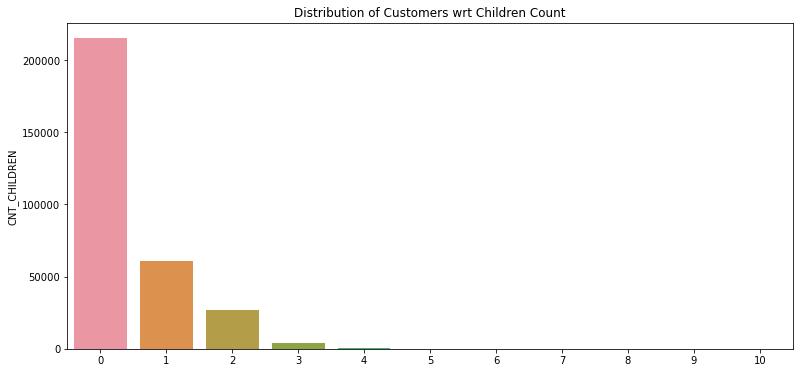

In [89]:
# Let's analyze how distribution is spread across the customers with respect to Children Count
plt.figure(figsize=[13,6])
counts = application_data.CNT_CHILDREN.value_counts()
graph = sns.barplot(x = counts.index, y = counts)
plt.xticks(rotation=0)
graph.set_title("Distribution of Customers wrt Children Count")
plt.show()

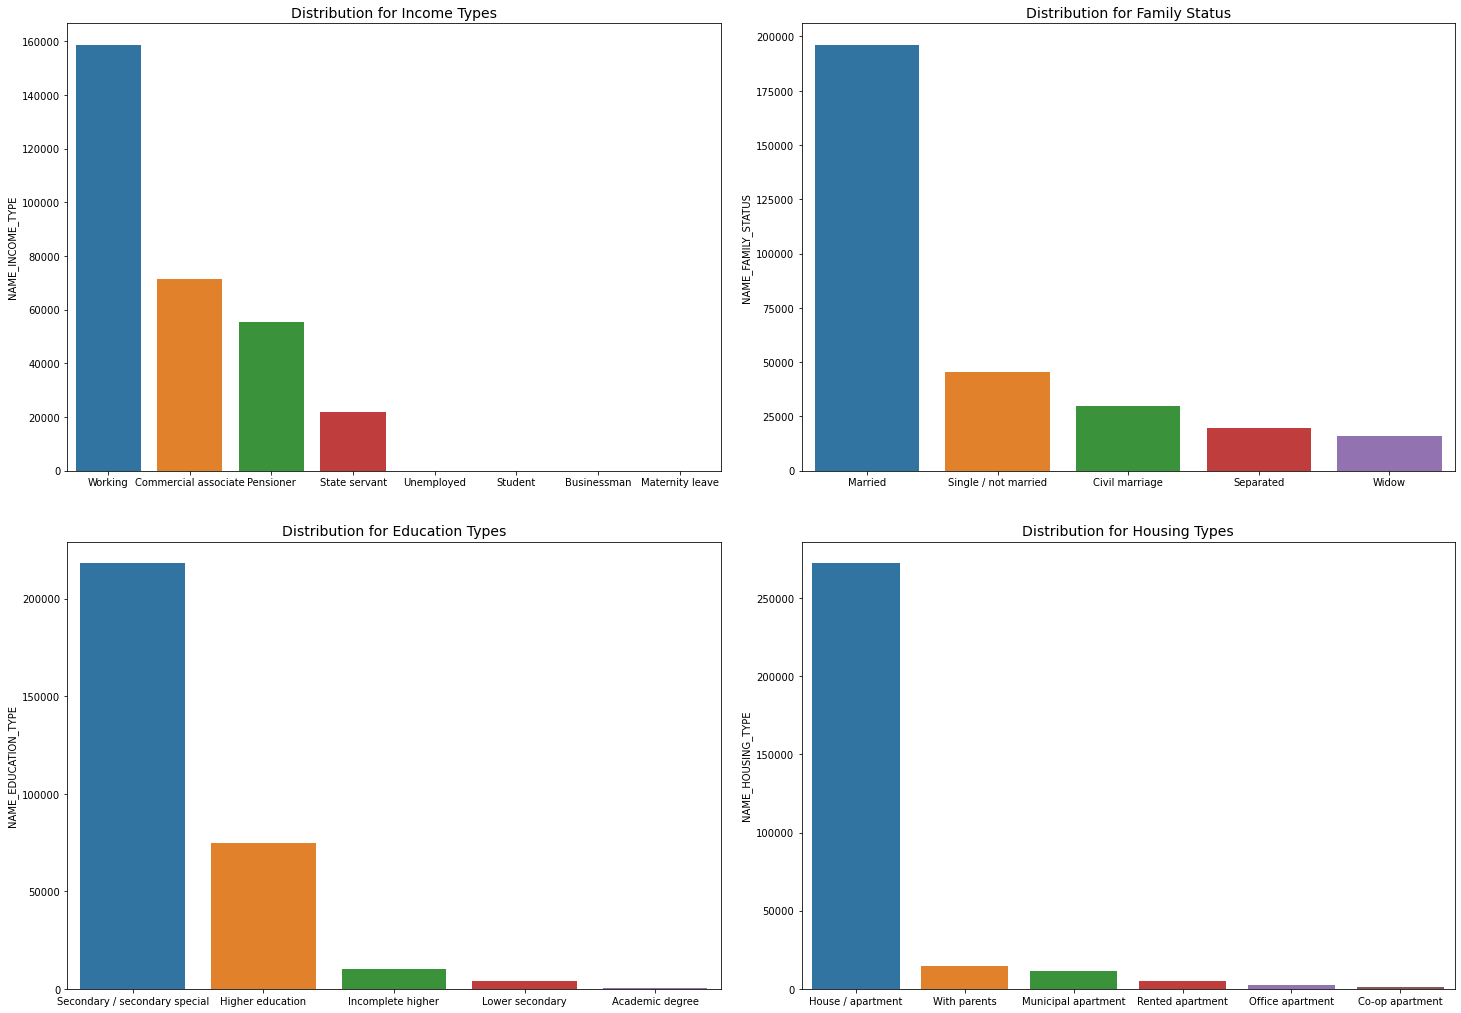

In [90]:
# We will plot multiple subplot to analyze the columns.
# There plots contain analysis of customers for Income Types, Family Status, Education Types, Housing Types.
fig, ax = plt.subplots(2, 2, figsize=(20,14))
# Making a plot with 2 subplots

income_types = application_data.NAME_INCOME_TYPE.value_counts()
family_status = application_data.NAME_FAMILY_STATUS.value_counts()
education_types = application_data.NAME_EDUCATION_TYPE.value_counts()
housing_types = application_data.NAME_HOUSING_TYPE.value_counts()

fig.tight_layout(h_pad=5,w_pad=5)
sns.barplot(x=income_types.index, y=income_types, ax=ax[0][0])
ax[0][0].set_title("Distribution for Income Types", fontsize=14)
sns.barplot(x=family_status.index, y=family_status, ax=ax[0][1])
ax[0][1].set_title("Distribution for Family Status", fontsize=14)
sns.barplot(x=education_types.index, y=education_types, ax=ax[1][0])
ax[1][0].set_title("Distribution for Education Types", fontsize=14)
sns.barplot(x=housing_types.index, y=housing_types, ax=ax[1][1])
ax[1][1].set_title("Distribution for Housing Types", fontsize=14)

plt.show()

In [91]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Business Entity Type 3,25.920548,1.745205
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,45.931507,3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Government,52.180822,0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,52.068493,8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,1.0,Religion,54.608219,8.323288


In [92]:
# Let's analyze the spread of data for Occupation Types
application_data.OCCUPATION_TYPE.value_counts()

Other                    96322
Laborers                 55162
Sales staff              32088
Core staff               27543
Managers                 21252
Drivers                  18596
High skill tech staff    11367
Accountants               9799
Medicine staff            8531
Security staff            6717
Cooking staff             5943
Cleaning staff            4653
Private service staff     2649
Low-skill Laborers        2093
Waiters/barmen staff      1347
Secretaries               1300
Realty agents              750
HR staff                   561
IT staff                   523
Name: OCCUPATION_TYPE, dtype: int64

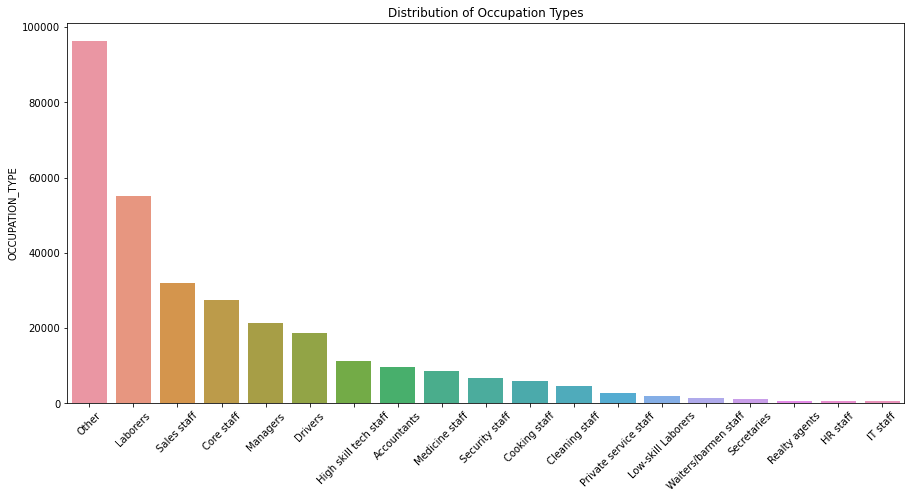

In [93]:
# Let's analyze how occupation types are spread across the data
plt.figure(figsize=[15,7])
counts = application_data.OCCUPATION_TYPE.value_counts()
graph = sns.barplot(x = counts.index, y = counts)
plt.xticks(rotation=45)
graph.set_title("Distribution of Occupation Types")
plt.show()

In [94]:
# Let's analyze the spread of data for Organization Types
application_data.ORGANIZATION_TYPE.value_counts()

Other                     72018
Business Entity Type 3    67887
Self-employed             38390
Medicine                  11183
Business Entity Type 2    10544
Government                10399
School                     8888
Trade: type 7              7825
Kindergarten               6874
Construction               6713
Business Entity Type 1     5974
Transport: type 4          5390
Trade: type 3              3486
Industry: type 9           3360
Industry: type 3           3277
Security                   3243
Housing                    2956
Industry: type 11          2702
Military                   2629
Bank                       2497
Agriculture                2454
Police                     2337
Transport: type 2          2203
Postal                     2156
Security Ministries        1973
Trade: type 2              1888
Restaurant                 1810
Services                   1573
University                 1325
Industry: type 7           1306
Transport: type 3          1187
Industry

In [95]:
def club_types(org_type):
    if ':' in org_type:
        org_type = org_type.split(':')[0]
    elif 'Type' in org_type:
        org_type = org_type.split()[0] + ' ' + org_type.split()[1]
    return org_type
application_data.ORGANIZATION_TYPE = application_data.ORGANIZATION_TYPE.apply(club_types)
application_data.ORGANIZATION_TYPE.value_counts()

Business Entity        84405
Other                  72018
Self-employed          38390
Industry               14294
Trade                  14289
Medicine               11183
Government             10399
Transport               8980
School                  8888
Kindergarten            6874
Construction            6713
Security                3243
Housing                 2956
Military                2629
Bank                    2497
Agriculture             2454
Police                  2337
Postal                  2156
Security Ministries     1973
Restaurant              1810
Services                1573
University              1325
Hotel                    966
Electricity              948
Insurance                592
Telecom                  577
Emergency                559
Advertising              429
Realtor                  395
Culture                  379
Mobile                   316
Legal Services           304
Cleaning                 260
Religion                  85
Name: ORGANIZA

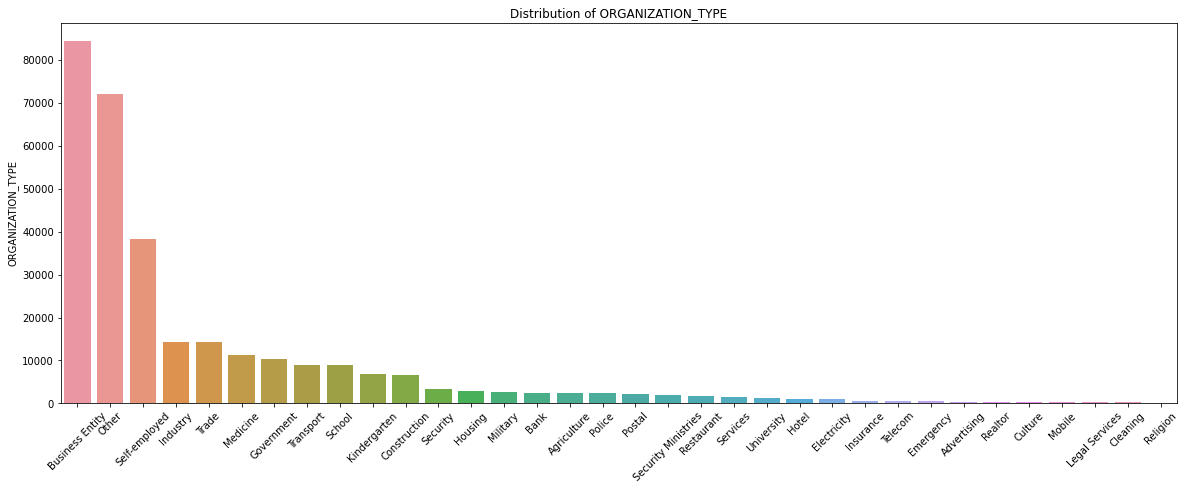

In [96]:
# Let's analyze how ORGANIZATION_TYPE types are spread across the data
plt.figure(figsize=[20,7])
counts = application_data.ORGANIZATION_TYPE.value_counts()
graph = sns.barplot(x = counts.index, y = counts)
plt.xticks(rotation=45)
graph.set_title("Distribution of ORGANIZATION_TYPE")
plt.show()

In [97]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Business Entity,25.920548,1.745205
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,45.931507,3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Government,52.180822,0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity,52.068493,8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,1.0,Religion,54.608219,8.323288


In [98]:
# Let's analyze the family member's count column
application_data.CNT_FAM_MEMBERS.value_counts()

2.0     158190
1.0      67805
3.0      52538
4.0      24670
5.0       3473
6.0        407
7.0         81
8.0         20
9.0          6
10.0         3
12.0         2
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [99]:
# We will change the type of the column from float to int
application_data.CNT_FAM_MEMBERS = application_data.CNT_FAM_MEMBERS.astype('int')
application_data.CNT_FAM_MEMBERS.value_counts()

2     158190
1      67805
3      52538
4      24670
5       3473
6        407
7         81
8         20
9          6
10         3
12         2
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

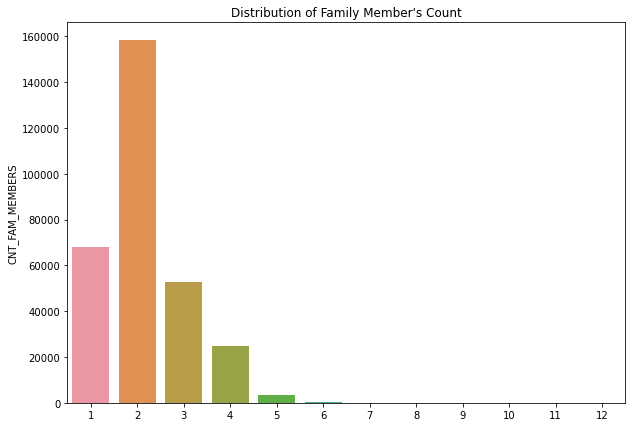

In [100]:
# Let's plot a bar graph for to visualize the districution
plt.figure(figsize=[10,7])
counts = application_data.CNT_FAM_MEMBERS.value_counts()
graph = sns.barplot(x = counts.index, y = counts)
plt.xticks(rotation=0)
graph.set_title("Distribution of Family Member's Count")
plt.show()

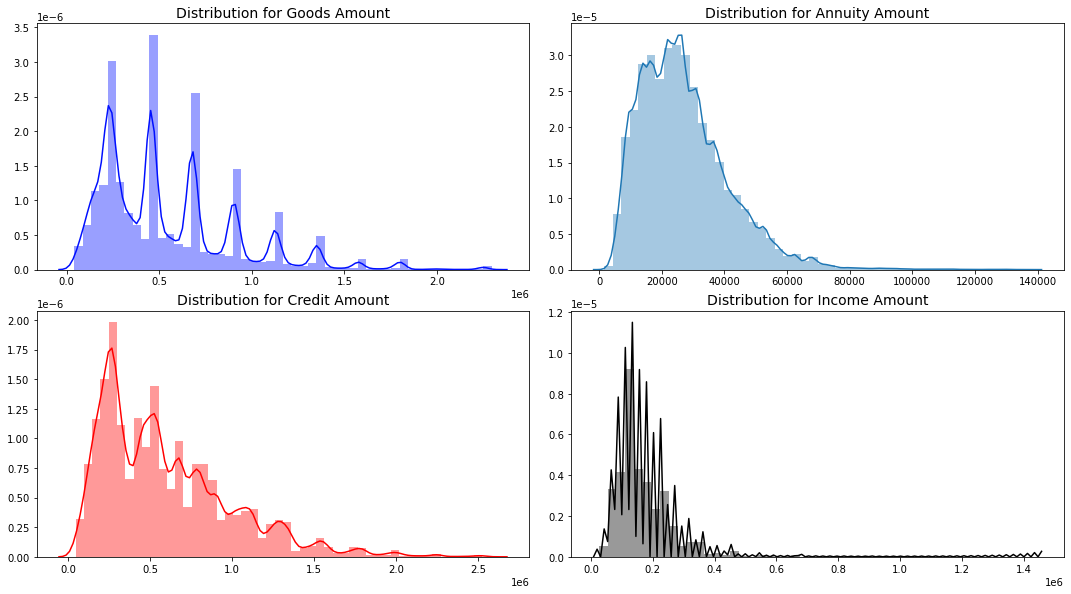

In [101]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
# Making a plot with 2 subplots

goods = application_data.AMT_GOODS_PRICE.values
annuity = application_data.AMT_ANNUITY.values
credit = application_data.AMT_CREDIT.values
income = application_data.AMT_INCOME_TOTAL.values
fig.tight_layout(h_pad=2)
sns.distplot(goods, ax=ax[0][0], color='#000FFF')
ax[0][0].set_title("Distribution for Goods Amount", fontsize=14)
sns.distplot(annuity, ax=ax[0][1])
ax[0][1].set_title("Distribution for Annuity Amount", fontsize=14)
sns.distplot(credit, ax=ax[1][0], color="#FF0000")
ax[1][0].set_title("Distribution for Credit Amount", fontsize=14)
sns.distplot(income, ax=ax[1][1], color="#000000")
ax[1][1].set_title("Distribution for Income Amount", fontsize=14)
plt.show()

In [102]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1,Business Entity,25.920548,1.745205
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,2,School,45.931507,3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1,Government,52.180822,0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2,Business Entity,52.068493,8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,1,Religion,54.608219,8.323288


In [103]:
application_data.shape

(307196, 20)

## Bivariate and Multivariate Analysis for Target Column
- We will analyze the Target column with all other columns one by one to create visualizations.
- We can analyze the driving factors to visualize how the distribution is spread across the customers who are facing difficulties and all other cases.
- We can thus determine what are the probable indicators that may lead the customers to default.

In [104]:
# Let's display the final cleaned data

application_data.head(7)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1,Business Entity,25.920548,1.745205
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,2,School,45.931507,3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1,Government,52.180822,0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2,Business Entity,52.068493,8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,1,Religion,54.608219,8.323288
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,Laborers,2,Other,46.413699,4.350685
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,House / apartment,Accountants,3,Business Entity,37.747945,8.575342


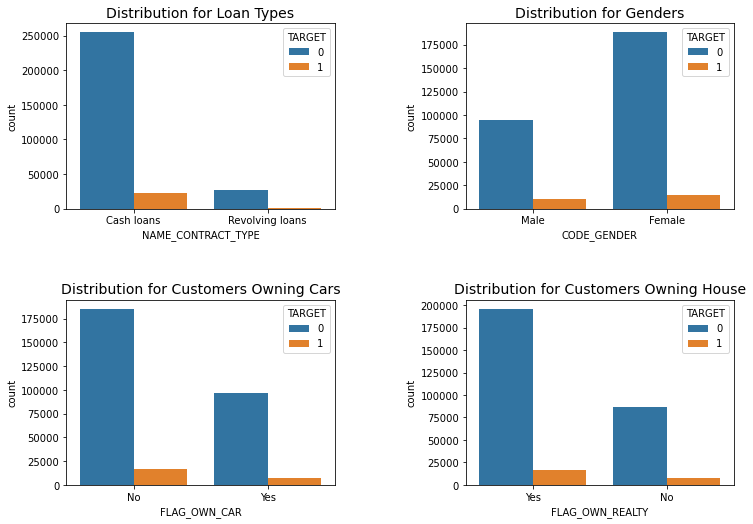

In [144]:
# We will plot multiple subplot to analyze the distribution for target variable against multiple columns
# There plots contain analysis of Target Vs Contract Type, Gender, Whether Customer Owns car or not, Whether Customer owns a house/flat.

fig, ax = plt.subplots(2, 2, figsize=(10,7))
# Making a plot with 2 subplots


fig.tight_layout(h_pad=7,w_pad=10)
sns.countplot(x=application_data.NAME_CONTRACT_TYPE, hue = application_data.TARGET, ax=ax[0][0])
ax[0][0].set_title("Distribution for Loan Types", fontsize=14)
sns.countplot(x=application_data.CODE_GENDER, hue = application_data.TARGET, ax=ax[0][1])
ax[0][1].set_title("Distribution for Genders", fontsize=14)
ax[0][1].set_xticklabels(['Male','Female'])
sns.countplot(x=application_data.FLAG_OWN_CAR, hue = application_data.TARGET, ax=ax[1][0])
ax[1][0].set_title("Distribution for Customers Owning Cars", fontsize=14)
ax[1][0].set_xticklabels(['No','Yes'])
sns.countplot(x=application_data.FLAG_OWN_REALTY, hue = application_data.TARGET, ax=ax[1][1])
ax[1][1].set_title("Distribution for Customers Owning House", fontsize=14)
ax[1][1].set_xticklabels(['Yes','No'])

plt.show()

In [140]:
# plt.legend(tuple(application_data.TARGET.value_counts().index), ('All other customers','Customers facing payment difficulties'))
tuple(application_data.TARGET.value_counts().index)

(0, 1)

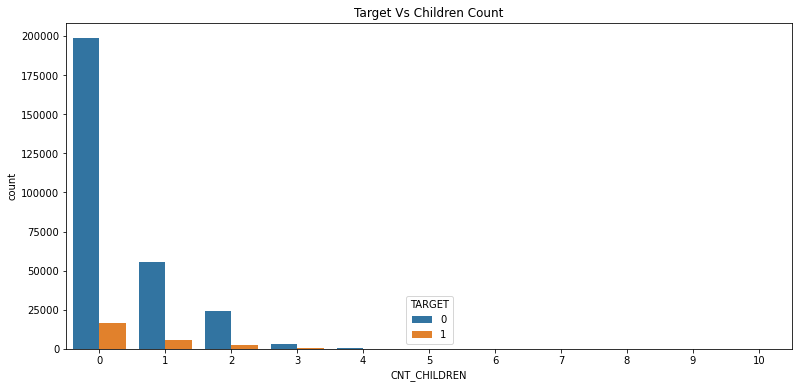

In [118]:
# Let's analyze how distribution is target variable is spread across the customers with respect to Children Count
plt.figure(figsize=[13,6])
graph = sns.countplot(x = application_data.CNT_CHILDREN, hue = application_data.TARGET)
graph.set_title("Target Vs Children Count")
plt.show()

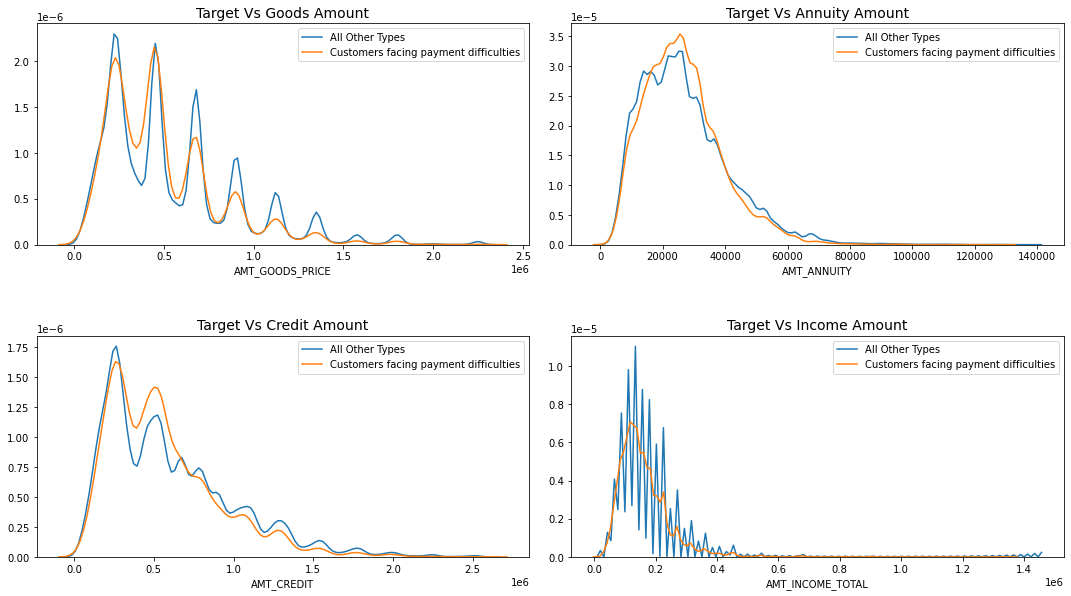

In [125]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=7)

sns.distplot(application_data[application_data.TARGET == 0].AMT_GOODS_PRICE,hist=False, label="All Other Types", ax=ax[0][0])
sns.distplot(application_data[application_data.TARGET == 1].AMT_GOODS_PRICE,hist=False, label="Customers facing payment difficulties", ax=ax[0][0])
ax[0][0].set_title("Target Vs Goods Amount", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].AMT_ANNUITY,hist=False, label="All Other Types", ax=ax[0][1])
sns.distplot(application_data[application_data.TARGET == 1].AMT_ANNUITY,hist=False, label="Customers facing payment difficulties", ax=ax[0][1])
ax[0][1].set_title("Target Vs Annuity Amount", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].AMT_CREDIT,hist=False, label="All Other Types", ax=ax[1][0])
sns.distplot(application_data[application_data.TARGET == 1].AMT_CREDIT,hist=False, label="Customers facing payment difficulties", ax=ax[1][0])
ax[1][0].set_title("Target Vs Credit Amount", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].AMT_INCOME_TOTAL,hist=False, label="All Other Types", ax=ax[1][1])
sns.distplot(application_data[application_data.TARGET == 1].AMT_INCOME_TOTAL,hist=False, label="Customers facing payment difficulties", ax=ax[1][1])
ax[1][1].set_title("Target Vs Income Amount", fontsize=14)


plt.show()


In [132]:
# Let's display the head again

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1,Business Entity,25.920548,1.745205
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,2,School,45.931507,3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1,Government,52.180822,0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2,Business Entity,52.068493,8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,1,Religion,54.608219,8.323288


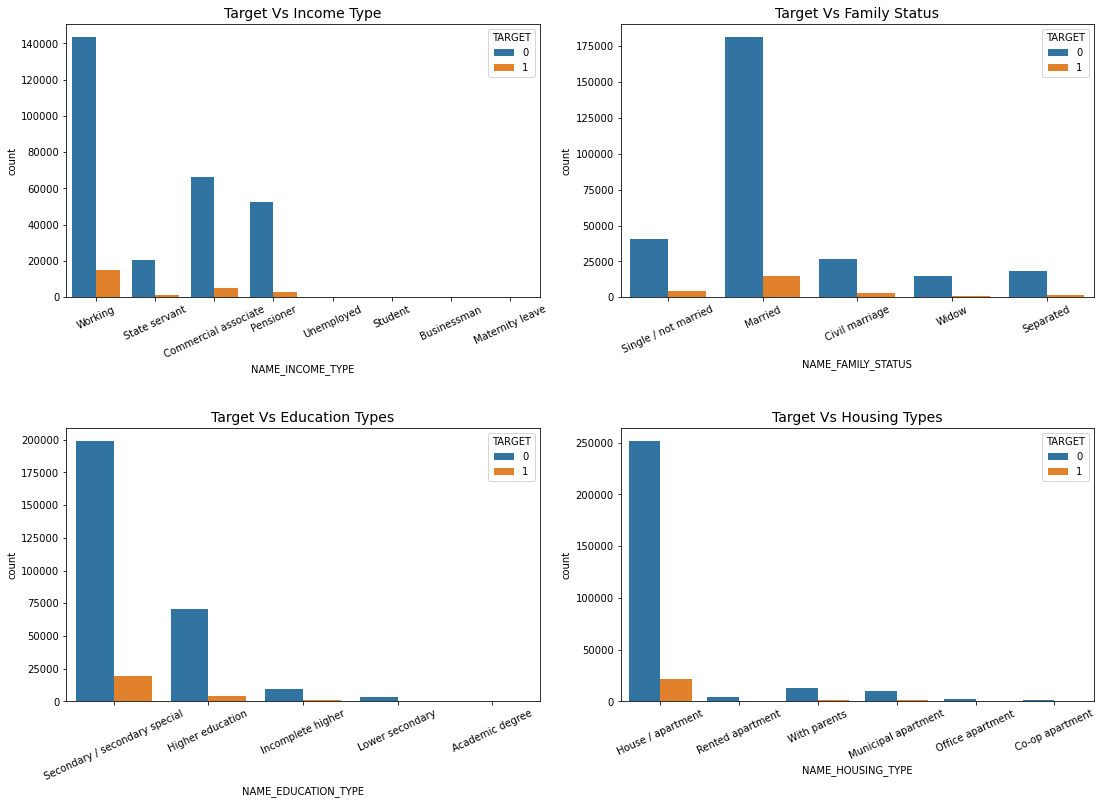

In [168]:
# We will plot multiple subplot to analyze the columns.
# There plots contain analysis of customers for Income Types, Family Status, Education Types, Housing Types.

fig, ax = plt.subplots(2, 2, figsize=(15,10))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=11,w_pad=5)

sns.countplot(x=application_data.NAME_INCOME_TYPE, hue = application_data.TARGET, ax=ax[0][0])
ax[0][0].set_title("Target Vs Income Type", fontsize=14)

sns.countplot(x=application_data.NAME_FAMILY_STATUS, hue = application_data.TARGET, ax=ax[0][1])
ax[0][1].set_title("Target Vs Family Status", fontsize=14)

sns.countplot(x=application_data.NAME_EDUCATION_TYPE, hue = application_data.TARGET, ax=ax[1][0])
ax[1][0].set_title("Target Vs Education Types", fontsize=14)

sns.countplot(x=application_data.NAME_HOUSING_TYPE, hue = application_data.TARGET, ax=ax[1][1])
ax[1][1].set_title("Target Vs Housing Types", fontsize=14)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25)
plt.show()

In [169]:
# plt.figure(figsize=[15,6])
# sns.violinplot(x ='NAME_EDUCATION_TYPE', y ='AMT_INCOME_TOTAL', data = application_data, hue ='TARGET', split = True)
# plt.show()